In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("image.jpeg")
img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Conversion 
img_convert.shape

(900, 1600, 3)

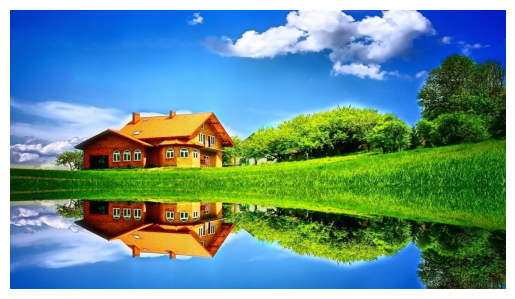

In [3]:
plt.imshow(img_convert)
plt.axis('off')
plt.show()

In [4]:
vector = np.float32(img_convert.reshape(-1,3)) # Float 32 is mandatory for kmeans algorithms in cv2
vector.shape

(1440000, 3)

## Using OpenCV's Kmeans
#### Input Parameters
- samples: must be np.float32. Every feature must be in single column, no matrix.
- attempts : Number of times algorithm using different initial points. Labels with **best compactness** is returned
- criteria: Stopping criteria (actual criteria, max_iteration, epsion)
    - cv2.TERM_CRITERIA_EPS: When the iteration reached accuracy of given epsilon
    - cv2.TERM_CRITERIA_MAX_ITER: When maximum iteration reached
    - Or either of above
- flags: 
    - cv2.KMEANS_PP_CENTERS 
    - cv2.KMEANS_RANDOM_CENTERS 
    
#### Output parameters
- compactness: **Overall** Sum of sq error distance between every point to centers
- labels
- centers

Done for K=1
Done for K=2
Done for K=3
Done for K=4
Done for K=5
Done for K=6
Done for K=7
Done for K=8
Done for K=9
Done for K=10
Done for K=11
Done for K=12
Done for K=13
Done for K=14
Done for K=15
Done for K=16
Done for K=17
Done for K=18
Done for K=19
Done for K=20


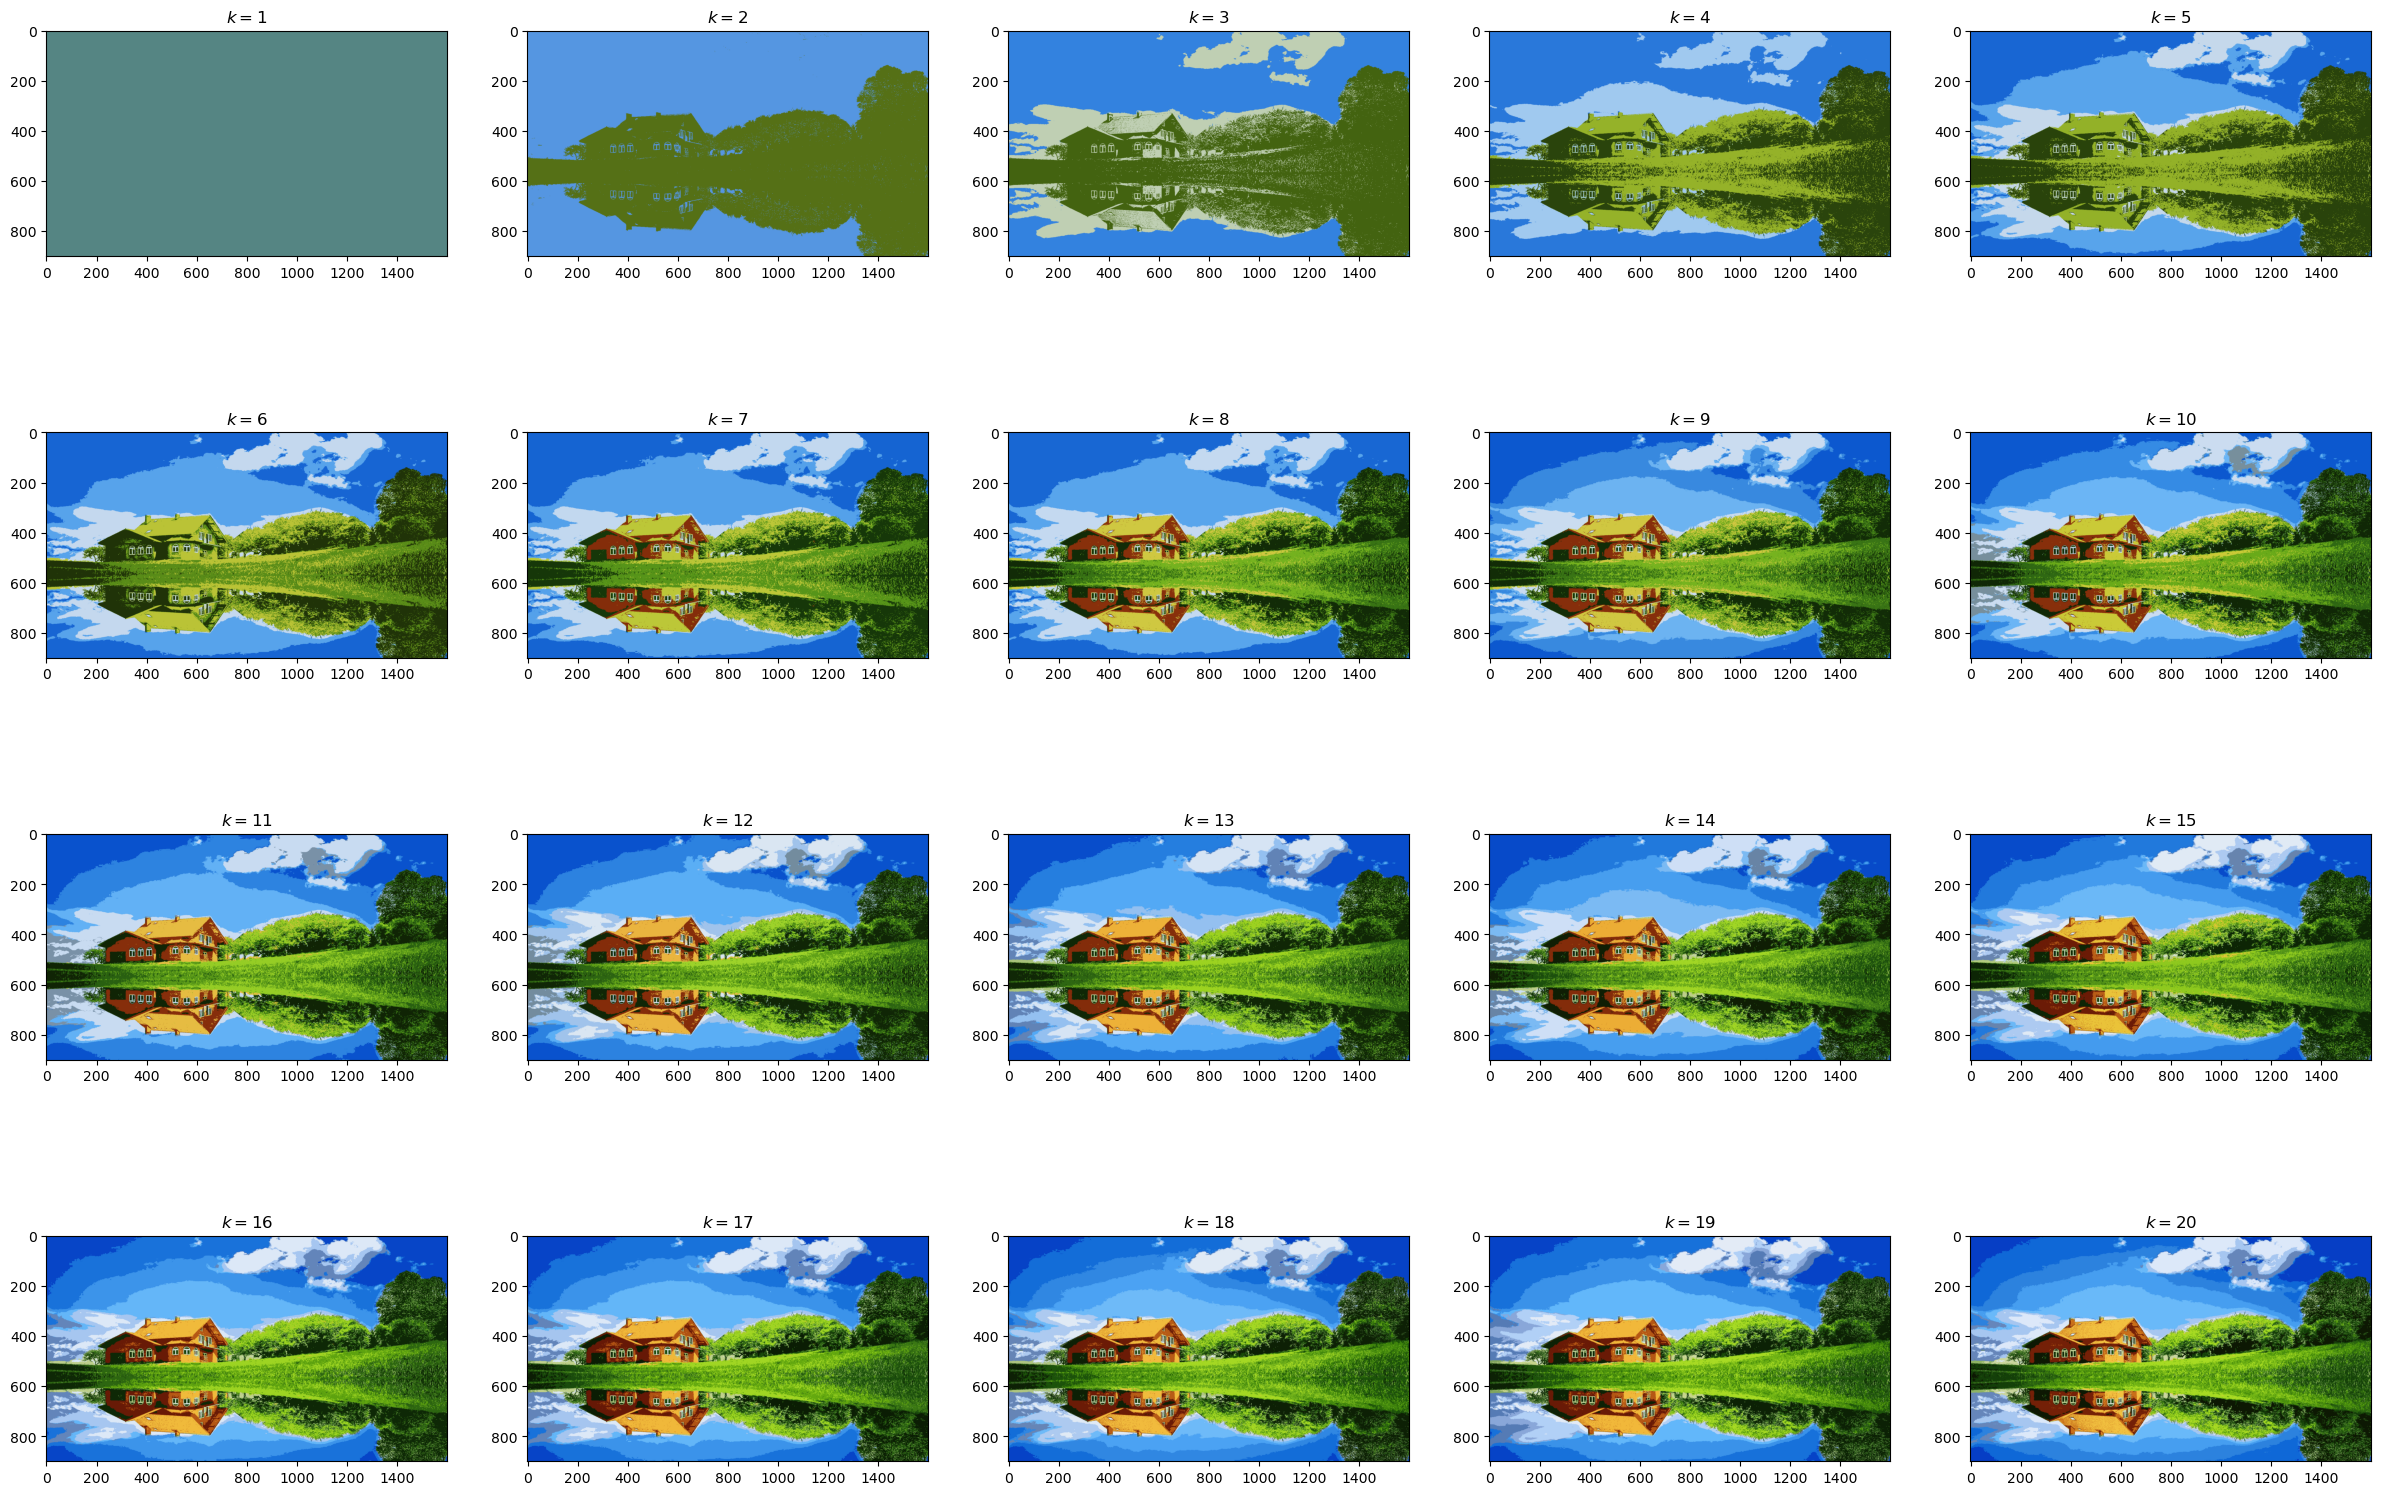

In [5]:
attempts=10 # Number of times algorithm using different initial points. Labels with best compactness is returned
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

plt.figure(figsize=(30,20))
for k in range(1,21):
    plt.subplot(4,5,k)
    plt.title(f"$k = {k}$")
    compactness, label, center=cv2.kmeans(vector,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    
    # Pixel range is 0-255, not float values
    center = center.astype('uint8')
    
    ## Assigning centers' rgb values to each pixel (i.e segmentation)
    output = center[label]
    
    res_image = output.reshape(img.shape)
    plt.imshow(res_image)
    
    print(f"Done for K={k}")
plt.show()

#### Observation
- Personally k=2 and k=5 is useful in above image
- As k increases, the more segments are formed, hence resembles original image.